In [73]:
import pandas as pd
import seaborn as sns 
from palmerpenguins import load_penguins
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
sns.set_style('white')

prior is low but likelihood is high, so posterior may not be high if prior << likelihood

Key is estimating , like P(y) we dk population! but estimate from samples, so MLE tells us that indeed 
the best estimate is derived from the sample mean. Same for the mean of the conditional distribution.

conditionally normal means within each class, the data is normal. reasonable assumption because of central limit theorem.

- Plotting the tuned Normal models for each species confirms that this naive Bayes assumption isn’t perfect – it’s a bit more idealistic than the density plots of the raw data in Figure 14.2. But it’s fine enough to continue. THIS IS BECAUSE THE ORIGINAL DATA IS NOT EXACTLY NORMAL, BUT THE CONDITIONAL NORMAL ASSUMPTION IS GOOD ENOUGH TO CONTINUE.
- Note only assumption of Naive Bayes is the random variables within xn are independent conditional on the class of observation.

In [51]:
df = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [11]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [12]:
penguins = penguins.drop(columns=["sex"], inplace=False).reset_index(drop=True) # drop sex column for simplicity as too many NAs

In [14]:
penguins = penguins.dropna().reset_index(drop=True) # drop rows with NAs, only 2 rows
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,2007
...,...,...,...,...,...,...,...
337,Chinstrap,Dream,55.8,19.8,207.0,4000.0,2009
338,Chinstrap,Dream,43.5,18.1,202.0,3400.0,2009
339,Chinstrap,Dream,49.6,18.2,193.0,3775.0,2009
340,Chinstrap,Dream,50.8,19.0,210.0,4100.0,2009


In [16]:
penguins["body_mass_g"].mean() # 4200 g

4201.754385964912

In [48]:
penguins["above_average_body_mass_g"] = (penguins["body_mass_g"] > penguins["body_mass_g"].mean()).astype(int)
penguins["above_average_body_mass_g"].value_counts()

0    193
1    149
Name: above_average_body_mass_g, dtype: int64

In [81]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,above_average_body_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2007,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2007,0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2007,0
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,2007,0
...,...,...,...,...,...,...,...,...
337,Chinstrap,Dream,55.8,19.8,207.0,4000.0,2009,0
338,Chinstrap,Dream,43.5,18.1,202.0,3400.0,2009,0
339,Chinstrap,Dream,49.6,18.2,193.0,3775.0,2009,0
340,Chinstrap,Dream,50.8,19.0,210.0,4100.0,2009,0


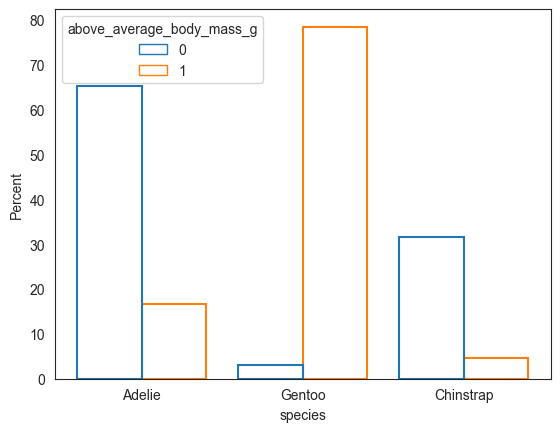

In [82]:
# plot the distribution of body mass for each species in python

ax = sns.histplot(
    x="species",
    hue="above_average_body_mass_g",
    data=penguins,
   multiple="dodge",
    stat="percent",
    shrink=0.8,
    common_norm=False,
    fill = False,
    discrete=True,
)

In [93]:
total = penguins.groupby('species').size().reset_index(name='counts')
print(total)

overweight = penguins[penguins.above_average_body_mass_g==1].groupby('species')['above_average_body_mass_g'].sum().reset_index()
print(overweight)

     species  counts
0     Adelie     151
1  Chinstrap      68
2     Gentoo     123
     species  above_average_body_mass_g
0     Adelie                         25
1  Chinstrap                          7
2     Gentoo                        117


In [95]:
overweight['above_average_body_mass_g'] = [i / j * 100 for i,j in zip(overweight['above_average_body_mass_g'], total['counts'])]
total['counts'] = [i / j * 100 for i,j in zip(total['counts'], total['counts'])]

print(total)
print(overweight) # percentage of overweight penguins for each species

     species  counts
0     Adelie   100.0
1  Chinstrap   100.0
2     Gentoo   100.0
     species  above_average_body_mass_g
0     Adelie                  16.556291
1  Chinstrap                  10.294118
2     Gentoo                  95.121951


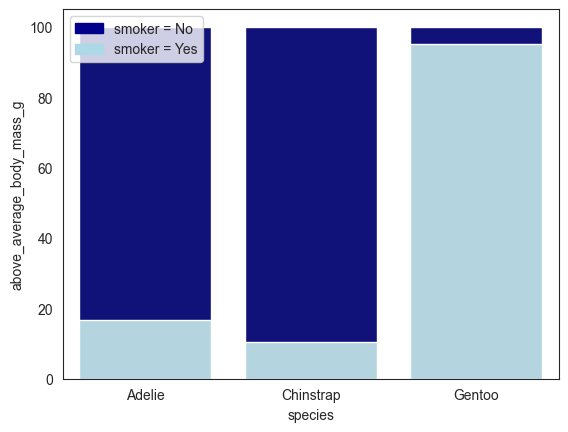

In [96]:


# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="species",  y="counts", data=total, color='darkblue')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="species", y="above_average_body_mass_g", data=overweight, color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='smoker = No')
bottom_bar = mpatches.Patch(color='lightblue', label='smoker = Yes')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

In [97]:
bill_length_mm = penguins[['bill_length_mm', 'species']]
bill_length_mm

,bill_length_mm,species
0,39.1,Adelie
1,39.5,Adelie
2,40.3,Adelie
3,36.7,Adelie
4,39.3,Adelie
...,...,...
337,55.8,Chinstrap
338,43.5,Chinstrap
339,49.6,Chinstrap
340,50.8,Chinstrap


- The plot below is the 1-d empirical distribution of `bill_length_mm` for all species.
- The vertical red line is the mean of the empirical distribution.
- This is where one “naive” part of naive Bayes classification comes into play. The naive Bayes method typically assumes that any quantitative predictor, here `X_2 = bill_length_mm`
    is continuous and conditionally Normal.

**Important**

From sklearn: and we can use Maximum A Posteriori (MAP) estimation to estimate $P(y)$  and $P(x_i|y)$ ; the former is then the relative frequency of class y in the training set.

The different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of $P(x_i|y)$.

page 475 of chans book says that sample mean of the normal distribution coincides when you use MLE to estimate the mean parameter of the normal distribution.
In other words, if $X_2 | Y = A \sim N(\mu_{A}, \sigma_{A}^2)$, then to find the $P(X_2 | Y = A)$, which is the probability of $X_2=x_2$ given $Y=A$,
we know that conditional PDF is about $X_2$ as $Y$ is fixed, so we need the parameters $\mu_{A}$ and $\sigma_{A}^2$ to find the PDF.  

So this is an inverse problem of finding the parameters $\mu_{A}$ and $\sigma_{A}^2$. 
A bit confused see chans page 469, but overall, the idea is that we want to find the parameters of the normal distribution that best fit the data.
And we use MLE to find the parameters of the normal distribution that best fit the data. It turns the parameters
found through MLE are the sample mean and sample variance of the data.

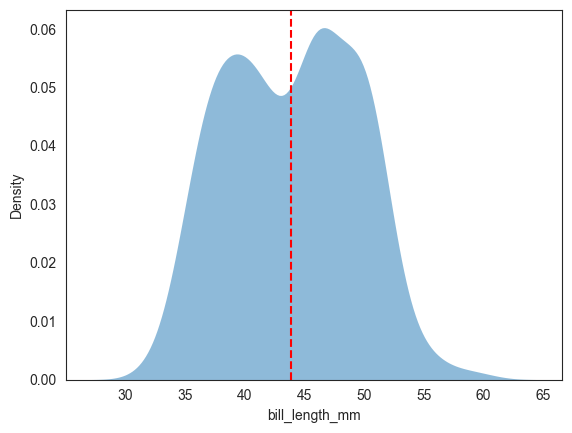

In [119]:
# plotting both distibutions on the same figure
_ = sns.kdeplot(data=penguins, x="bill_length_mm", fill=True, common_norm=False, alpha=.5, linewidth=0, legend=True)
# plot vertical line 
_ = plt.axvline(x=penguins["bill_length_mm"].mean(), color='red', linestyle='--')
# plt.legend()
plt.show();

Penguin with bill length of 50mm.


$P(x_2=50|y=Adelie)$

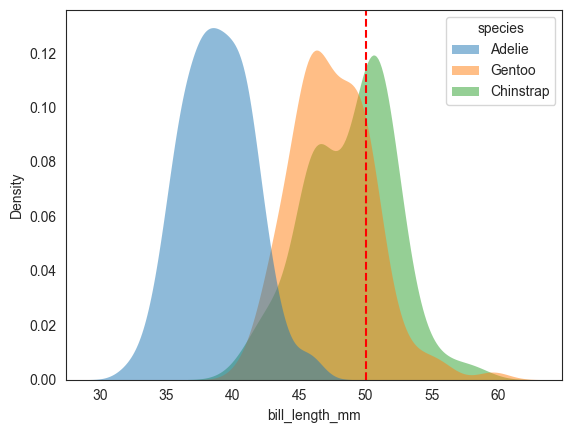

In [113]:
# plotting both distibutions on the same figure
_ = sns.kdeplot(data=penguins, x="bill_length_mm", hue="species", fill=True, common_norm=False, alpha=.5, linewidth=0, legend=True)
# plot vertical line 
_ = plt.axvline(50, color='r', linestyle='--', label='50 mm')
# plt.legend()
plt.show();

In [ ]:
# plot conditional distribution of bill length given species



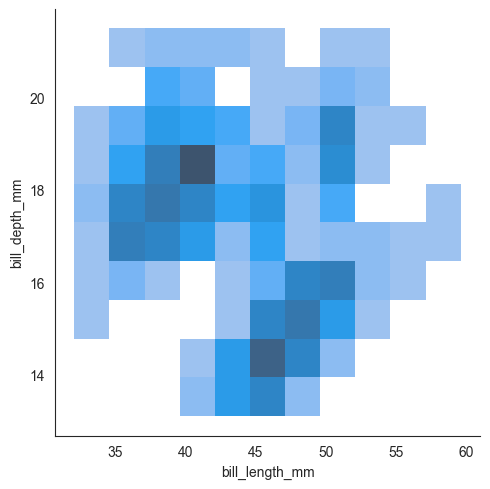

In [114]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm")

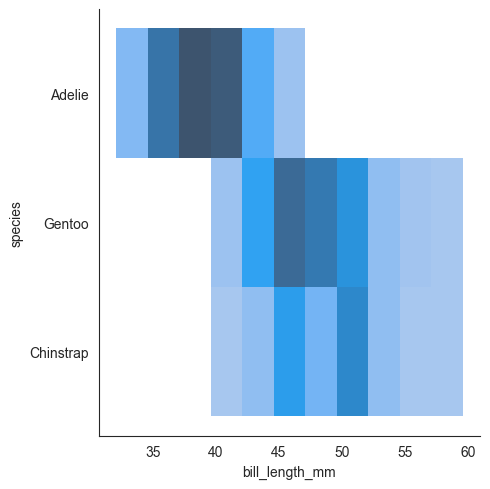

In [115]:
sns.displot(penguins, x="bill_length_mm", y="species")

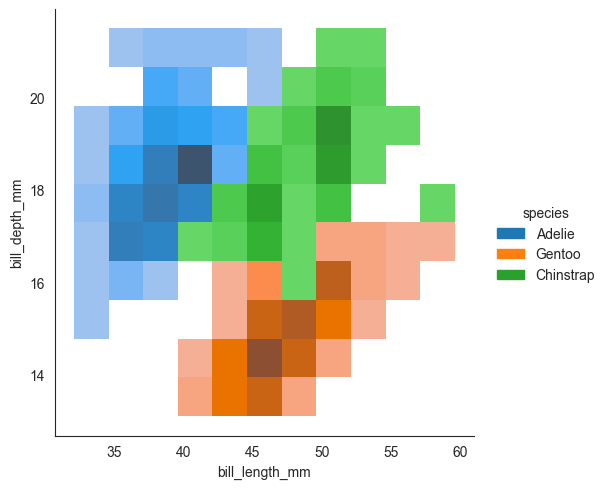

In [116]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

## Plotting joint and marginal distributions

The first is jointplot(), which augments a bivariate relatonal or distribution plot with the marginal distributions of the two variables. By default, jointplot() represents the bivariate distribution using scatterplot() and the marginal distributions using histplot():

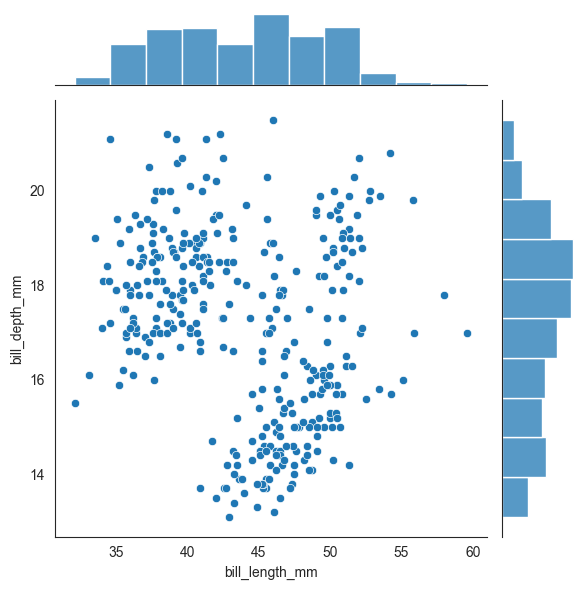

In [117]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

In [ ]:
ax = sns.histplot(x = df['class'], hue=df['survived'], multiple="dodge", 
                  stat = 'density', shrink = 0.8, common_norm=False)

In [ ]:
sns.displot(data=penguins, x="body_mass_g", hue="species", kind="kde", fill=True)